In [1]:
import vmd_contact
import _heatmap_no_bar
from _heatmap_no_bar import *
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
font = {'size': 11, 'weight':'bold'}
matplotlib.rc('font', **font)


In [2]:
def filter_dist_matrix(distance_matrix,receptor_labels,ligand_labels,cutoff,max_value):
    filtered_rec_labels = []
    filtered_lig_labels = []
    for i in range(len(receptor_labels)):
        for j in range(len(ligand_labels)):
            if distance_matrix[i][j]<cutoff:
                filtered_rec_labels.append(receptor_labels[i])
                filtered_lig_labels.append(ligand_labels[j])
    filtered_rec_labels = sorted(list(set(filtered_rec_labels)))
    filtered_lig_labels = sorted(list(set(filtered_lig_labels)))
    print (filtered_rec_labels)
    print (filtered_lig_labels)
    
    new_matrix = np.full((len(filtered_rec_labels), len(filtered_lig_labels)), max_value, dtype= float)
    
    for i in range(len(receptor_labels)):
        for j in range(len(ligand_labels)):
            if distance_matrix[i][j]<cutoff:
                filtered_rec_index = [f for f in range(len(filtered_rec_labels)) if filtered_rec_labels[f]==receptor_labels[i]][0]
                filtered_lig_index = [f for f in range(len(filtered_lig_labels)) if filtered_lig_labels[f]==ligand_labels[j]][0]
                new_matrix[filtered_rec_index][filtered_lig_index] = distance_matrix[i][j]
    return new_matrix, filtered_rec_labels, filtered_lig_labels

def rewrite_ligand_labels(ligand_labels):
    new_labels = []
    for l in ligand_labels:
        new_labels.append("%3d"%(int(l.split()[0])-8)+' '+l.split()[1])
    return new_labels

In [3]:
top_pdb = '6i6h.pdb'
if not os.path.exists('6i6h.pdb'):
    os.system('wget https://files.rcsb.org/download/6i6h.pdb --no-check-certificate')

In [4]:
receptor_chain_ID = 'A'
ligand_chain_ID = 'B'
receptor_resids = [5,9,47,48,50,54,55,56,59,60,63,64,67,111,112,116,117,120,158,159,162,165,166,169,177]
lig_resids = [2,3,4,5,6,7]
traj = None
cutoff = 4.5

In [5]:
record_keyword = top_pdb[:-4]+'_chain'+receptor_chain_ID+'vs'+ligand_chain_ID
step = vmd_contact.Distance(top_pdb, receptor_chain_ID, ligand_chain_ID, traj, lig_resids, receptor_resids)
distance_matrix,receptor_labels,ligand_labels = step.contact_dist_vmd_heavy()

new_matrix =np.zeros((distance_matrix.shape[1], distance_matrix.shape[0]))
for i in range(distance_matrix.shape[1]):
    for j in range(distance_matrix.shape[0]):
        new_matrix[i][j]=distance_matrix[j][i]
#new_lig_labels = rewrite_ligand_labels(ligand_labels)
new_lig_labels = [ ' -6 A', ' -5 E', ' -4 K', ' -3 D', ' -2 E', ' -1 L']
rec_labels = ['  5 R','  9 D',' 47 R',' 48 Y',' 50 D',' 54 S', ' 55 F',' 56 I',' 59 Y',' 60 N',' 63 M',' 64 K',' 67 Y','111 H','112 D','116 L','117 E','120 W','158 Y','159 R','162 Y','165 N','166 W','169 R','177 D']

print (new_matrix.shape)
print (new_lig_labels)

 44%|████▍     | 11/25 [00:00<00:00, 109.16it/s]

range 5 to 177 residues are used for calculating contact frequency.
Distance calculate based on pdb frame.


100%|██████████| 25/25 [00:00<00:00, 115.83it/s]

(6, 25)
[' -6 A', ' -5 E', ' -4 K', ' -3 D', ' -2 E', ' -1 L']


Text(0.5, 0, 'receptor residues')

<Figure size 432x288 with 0 Axes>

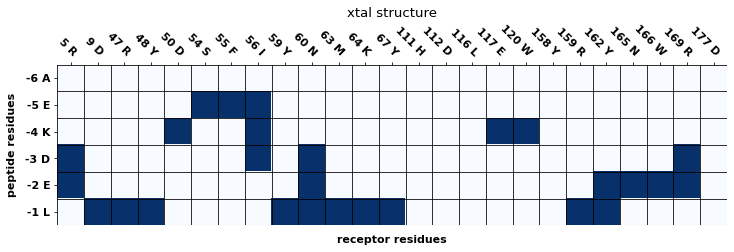

In [6]:
plt.clf()
plt.figure(figsize=(12,3))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
cutoff = 4.5
max_value = cutoff

def binary_matrix(data_matrix, cutoff_value):
    new_mat = np.zeros((data_matrix.shape[0], data_matrix.shape[1]))
    for i in range(data_matrix.shape[0]):
        for j in range(data_matrix.shape[1]):
            if data_matrix[i][j] < cutoff_value:
                new_mat[i][j] = 1
            else:
                new_mat[i][j] = 0 
    return new_mat

im,cbar = heatmap(binary_matrix(new_matrix, cutoff),new_lig_labels,rec_labels, ax=ax,cmap="Blues", vmax=1, cbarlabel="Distance")
#texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title('xtal structure')
plt.ylabel('peptide residues',**font)
plt.xlabel('receptor residues',**font)



## Below this figure was used in the manuscript.

 44%|████▍     | 11/25 [00:00<00:00, 104.93it/s]

range 5 to 177 residues are used for calculating contact frequency.
Distance calculate based on pdb frame.


100%|██████████| 25/25 [00:00<00:00, 122.52it/s]


(6, 25)
[' -6 A', ' -5 E', ' -4 K', ' -3 D', ' -2 E', ' -1 L']


<Figure size 432x288 with 0 Axes>

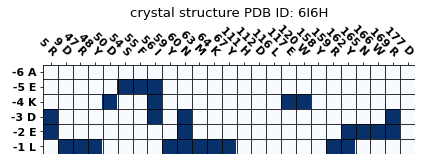

In [10]:
receptor_chain_ID = 'A'
ligand_chain_ID = 'B'
receptor_resids = [5,9,47,48,50,54,55,56,59,60,63,64,67,111,112,116,117,120,158,159,162,165,166,169,177]
lig_resids = [2,3,4,5,6,7]
traj = None
cutoff = 4.5
record_keyword = top_pdb[:-4]+'_chain'+receptor_chain_ID+'vs'+ligand_chain_ID
step = vmd_contact.Distance(top_pdb, receptor_chain_ID, ligand_chain_ID, traj, lig_resids, receptor_resids)
distance_matrix,receptor_labels,ligand_labels = step.contact_dist_vmd_heavy()

new_matrix =np.zeros((distance_matrix.shape[1], distance_matrix.shape[0]))
for i in range(distance_matrix.shape[1]):
    for j in range(distance_matrix.shape[0]):
        new_matrix[i][j]=distance_matrix[j][i]
#new_lig_labels = rewrite_ligand_labels(ligand_labels)
new_lig_labels = [ ' -6 A', ' -5 E', ' -4 K', ' -3 D', ' -2 E', ' -1 L']
rec_labels = ['  5 R','  9 D',' 47 R',' 48 Y',' 50 D',' 54 S', ' 55 F',' 56 I',' 59 Y',' 60 N',' 63 M',' 64 K',' 67 Y','111 H','112 D','116 L','117 E','120 W','158 Y','159 R','162 Y','165 N','166 W','169 R','177 D']

print (new_matrix.shape)
print (new_lig_labels)
plt.clf()
fig, ax = plt.subplots(figsize=(6,3))

cutoff = 4.5
max_value = cutoff

def binary_matrix(data_matrix, cutoff_value):
    new_mat = np.zeros((data_matrix.shape[0], data_matrix.shape[1]))
    for i in range(data_matrix.shape[0]):
        for j in range(data_matrix.shape[1]):
            if data_matrix[i][j] < cutoff_value:
                new_mat[i][j] = 1
            else:
                new_mat[i][j] = 0 
    return new_mat

im,cbar = heatmap(binary_matrix(new_matrix, cutoff),new_lig_labels,rec_labels, ax=ax,cmap="Blues", vmax=1, cbarlabel="Distance")
#texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title('crystal structure PDB ID: 6I6H')

#plt.ylabel('peptide residues',**font)
#plt.xlabel('receptor residues',**font)
plt.tight_layout()

plt.savefig('/home/bxie/xtal_heatmap.png')